In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import lasio
import os

In [3]:
las_files_path = "../train-data"
las_files = [f for f in os.listdir(las_files_path) if f.endswith('.las.txt') ]

In [4]:
len(las_files)

98

### Load and convert each las file to dataframe

In [5]:
dfs = []
mutual_columns = set()

for las_file in las_files:
    las = lasio.read(os.path.join(las_files_path, las_file))
    df = las.df()
    dfs.append(df)
    
    # Update non_mutual_columns
    if not mutual_columns:
        mutual_columns.update(df.columns)
    else:
        mutual_columns.intersection_update(df.columns)

In [6]:
mutual_columns

{'CALI',
 'DEPTH_MD',
 'DTC',
 'FORCE_2020_LITHOFACIES_CONFIDENCE',
 'FORCE_2020_LITHOFACIES_LITHOLOGY',
 'GR',
 'NPHI',
 'RDEP',
 'RHOB',
 'X_LOC',
 'Y_LOC',
 'Z_LOC'}

### Remove non-mutual columns from each DATAFRAME

In [7]:
dfs = [df.drop(columns=list(df.columns.difference(mutual_columns))) for df in dfs]

### Merge Dataframes

In [8]:
merged_df = pd.concat(dfs, ignore_index=True)

In [9]:
merged_df.head()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,RDEP,DTC,NPHI,GR,RHOB,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
0,NaN,NaN,NaN,NaN,206.224609,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,206.224625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,206.224655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,206.224670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,206.224701,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926414 entries, 0 to 1926413
Data columns (total 12 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   float64
 2   CALI                               float64
 3   RDEP                               float64
 4   DTC                                float64
 5   NPHI                               float64
 6   GR                                 float64
 7   RHOB                               float64
 8   DEPTH_MD                           float64
 9   X_LOC                              float64
 10  Y_LOC                              float64
 11  Z_LOC                              float64
dtypes: float64(12)
memory usage: 176.4 MB


In [11]:
merged_df.describe()

,FORCE_2020_LITHOFACIES_CONFIDENCE,FORCE_2020_LITHOFACIES_LITHOLOGY,CALI,RDEP,DTC,NPHI,GR,RHOB,DEPTH_MD,X_LOC,Y_LOC,Z_LOC
count,1.235373e+06,1.226648e+06,1.266217e+06,1.821447e+06,1.551056e+06,862976.000000,1.895183e+06,1.200510e+06,1.824116e+06,1.824116e+06,1.824116e+06,1.824116e+06
mean,1.155601e+00,6.153145e+04,1.332202e+01,9.284806e+00,1.184558e+02,0.339204,6.878315e+01,2.224463e+00,1.900224e+03,4.761019e+05,6.675222e+06,-1.854604e+03
std,4.398883e-01,1.415136e+04,3.700112e+00,9.900559e+01,3.204021e+01,0.133612,3.465592e+01,3.915355e-01,1.059969e+03,3.048136e+04,1.349903e+05,1.030665e+03
min,1.000000e+00,3.000000e+04,2.340806e+00,1.000000e-04,0.000000e+00,-0.037328,-1.562818e+01,0.000000e+00,9.872000e+01,4.232375e+05,6.429286e+06,-5.435889e+03
25%,1.000000e+00,6.500000e+04,1.043815e+01,8.951903e-01,9.225804e+01,0.246330,4.517743e+01,2.070150e+00,1.043532e+03,4.509588e+05,6.560991e+06,-2.588457e+03
50%,1.000000e+00,6.500000e+04,1.261052e+01,1.387843e+00,1.202946e+02,0.333831,6.661869e+01,2.270564e+00,1.771801e+03,4.744099e+05,6.728316e+06,-1.738921e+03
75%,1.000000e+00,6.500000e+04,1.660755e+01,2.244801e+00,1.449926e+02,0.438474,8.820755e+01,2.465437e+00,2.626626e+03,4.906490e+05,6.787700e+06,-1.017924e+03
max,3.000000e+00,9.900000e+04,3.211106e+01,1.999997e+03,3.204789e+02,0.999570,1.141292e+03,3.457820e+00,5.477672e+03,5.726328e+05,6.853526e+06,-7.265216e+01


In [12]:
merged_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE     691041
FORCE_2020_LITHOFACIES_LITHOLOGY      699766
CALI                                  660197
RDEP                                  104967
DTC                                   375358
NPHI                                 1063438
GR                                     31231
RHOB                                  725904
DEPTH_MD                              102298
X_LOC                                 102298
Y_LOC                                 102298
Z_LOC                                 102298
dtype: int64

### Visualize percentage of missing entries
...

## Clean Dataset
### Drop column with <50% data entry

In [13]:
merged_df.drop('NPHI', axis=1, inplace=True)

In [14]:
merged_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE    691041
FORCE_2020_LITHOFACIES_LITHOLOGY     699766
CALI                                 660197
RDEP                                 104967
DTC                                  375358
GR                                    31231
RHOB                                 725904
DEPTH_MD                             102298
X_LOC                                102298
Y_LOC                                102298
Z_LOC                                102298
dtype: int64

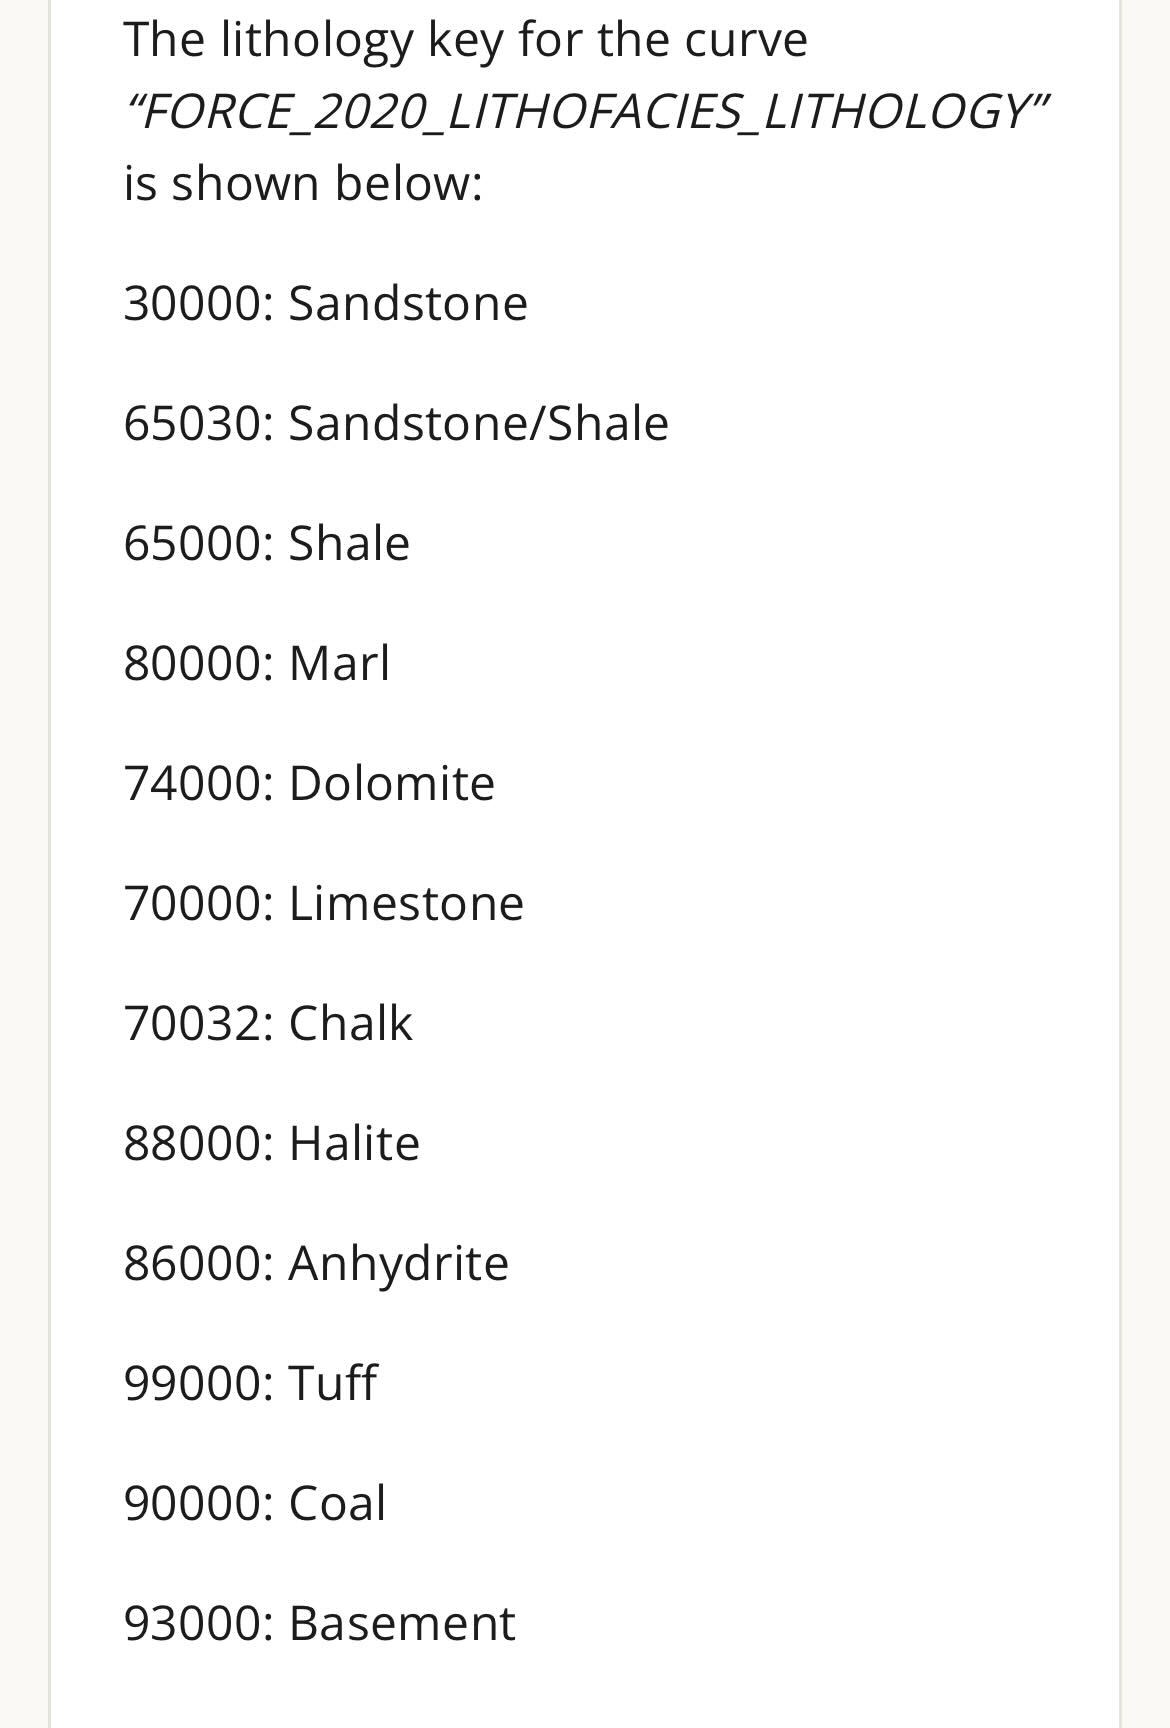

In [15]:
#Create a lithology dictionary
lithologies=  {30000: [0, "Sandstone"],
    65000: [1, "Shale"],
    65030: [2, "Sandstone/Stone"],
    70000: [3, "Limestone"],
    70032: [4, "Chalk"],
    74000: [5, "Dolomite"],
    80000: [6, "Marl"],
    99000: [7, "Tuff"],
    90000: [8, "Coal"],
    86000: [9, "Anhydrite"],
    88000: [10, "Halite"],
    93000: [11, "Basement"]}

In [16]:
for key, value in lithologies.items():
        merged_df.loc[merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithologies[key][0]

In [17]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([nan,  1.,  0.,  2.,  3.,  7.,  6.,  9.,  5.,  4.,  8., 10., 11.])

In [18]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([nan,  1.,  0.,  2.,  3.,  7.,  6.,  9.,  5.,  4.,  8., 10., 11.])

## Prepare Test Data

In [50]:
las_test = lasio.read("../test-data/35_11-13.las.txt")
test_df1 = las_test.df()

In [51]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 19119 entries, 386.078 to 3292.014
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  2425 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   2430 non-null   float64
 2   CALI                               2430 non-null   float64
 3   BS                                 19112 non-null  float64
 4   ROPA                               19103 non-null  float64
 5   ROP                                18584 non-null  float64
 6   RDEP                               18534 non-null  float64
 7   RMED                               18374 non-null  float64
 8   RMIC                               2195 non-null   float64
 9   DTS                                4892 non-null   float64
 10  DTC                                4190 non-null   float64
 11  NPHI                               5827 non

#### Clean test data

In [21]:
# Remove columns that are not in merged_df

# Get commot columns
common_columns = merged_df.columns.intersection(test_df.columns)

In [22]:
common_columns

Index(['FORCE_2020_LITHOFACIES_CONFIDENCE', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'CALI', 'RDEP', 'DTC', 'GR', 'RHOB', 'DEPTH_MD', 'X_LOC', 'Y_LOC',
       'Z_LOC'],
      dtype='object')

In [23]:
test_df = test_df[common_columns]

In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 19119 entries, 386.078 to 3292.014
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  2425 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   2430 non-null   float64
 2   CALI                               2430 non-null   float64
 3   RDEP                               18534 non-null  float64
 4   DTC                                4190 non-null   float64
 5   GR                                 18812 non-null  float64
 6   RHOB                               2201 non-null   float64
 7   DEPTH_MD                           18534 non-null  float64
 8   X_LOC                              18534 non-null  float64
 9   Y_LOC                              18534 non-null  float64
 10  Z_LOC                              18534 non-null  float64
dtypes: float64(11)
memory usage: 1.8 MB


In [52]:
test_df1["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([   nan, 65000., 65030., 30000., 70000.])

In [53]:
test_df1.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE    16694
FORCE_2020_LITHOFACIES_LITHOLOGY     16689
CALI                                 16689
BS                                       7
ROPA                                    16
ROP                                    535
RDEP                                   585
RMED                                   745
RMIC                                 16924
DTS                                  14227
DTC                                  14929
NPHI                                 13292
PEF                                  16918
GR                                     307
RHOB                                 16918
DRHO                                 16689
DEPTH_MD                               585
X_LOC                                  585
Y_LOC                                  585
Z_LOC                                  585
dtype: int64

#### Import a new test dataset
    since the missing value for our target is way more than the non missing, we then have to import an additional dataset

In [27]:
las_test2 = lasio.read("../test-data/35_11-15 S.las.txt")
test_df2 = las_test2.df()
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18832 entries, 390.0404 to 3252.3524
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  2598 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   2596 non-null   float64
 2   CALI                               2599 non-null   float64
 3   BS                                 18377 non-null  float64
 4   ROPA                               18739 non-null  float64
 5   ROP                                18314 non-null  float64
 6   RDEP                               18175 non-null  float64
 7   RMED                               18004 non-null  float64
 8   RXO                                2730 non-null   float64
 9   RMIC                               2228 non-null   float64
 10  DTS                                2647 non-null   float64
 11  DTC                                4868 n

In [28]:
# Remove columns that are not in merged_df

# Get commot columns
common_columns = merged_df.columns.intersection(test_df2.columns)
test_df2 = test_df2[common_columns]
test_df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 18832 entries, 390.0404 to 3252.3524
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   FORCE_2020_LITHOFACIES_CONFIDENCE  2598 non-null   float64
 1   FORCE_2020_LITHOFACIES_LITHOLOGY   2596 non-null   float64
 2   CALI                               2599 non-null   float64
 3   RDEP                               18175 non-null  float64
 4   DTC                                4868 non-null   float64
 5   GR                                 18252 non-null  float64
 6   RHOB                               2228 non-null   float64
 7   DEPTH_MD                           18175 non-null  float64
 8   X_LOC                              18175 non-null  float64
 9   Y_LOC                              18175 non-null  float64
 10  Z_LOC                              18175 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [54]:
test_df = pd.concat([test_df1, test_df2])

In [55]:
test_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE    32928
FORCE_2020_LITHOFACIES_LITHOLOGY     32925
CALI                                 32922
BS                                   18839
ROPA                                 18848
ROP                                  19367
RDEP                                  1242
RMED                                 19577
RMIC                                 35756
DTS                                  33059
DTC                                  28893
NPHI                                 32124
PEF                                  35750
GR                                     887
RHOB                                 33522
DRHO                                 35521
DEPTH_MD                              1242
X_LOC                                 1242
Y_LOC                                 1242
Z_LOC                                 1242
dtype: int64

#### Drop rows with missing values

In [31]:
merged_df.dropna(inplace=True)
merged_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE    0
FORCE_2020_LITHOFACIES_LITHOLOGY     0
CALI                                 0
RDEP                                 0
DTC                                  0
GR                                   0
RHOB                                 0
DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
dtype: int64

In [57]:
test_df.dropna(inplace=True)
test_df.isna().sum()

FORCE_2020_LITHOFACIES_CONFIDENCE    0
FORCE_2020_LITHOFACIES_LITHOLOGY     0
CALI                                 0
BS                                   0
ROPA                                 0
ROP                                  0
RDEP                                 0
RMED                                 0
RMIC                                 0
DTS                                  0
DTC                                  0
NPHI                                 0
PEF                                  0
GR                                   0
RHOB                                 0
DRHO                                 0
DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
dtype: int64

In [33]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] = merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype(int)

In [34]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] = test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype(int)

In [35]:
# Replace column's entries with corresponding discrete values for test data sets
for key, value in lithologies.items():
    test_df.loc[test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithologies[key][0]

In [36]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].unique()

array([1, 2, 0, 3, 8])

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

## Select a Model

In [38]:
#We'll be working with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

#initialize model
model=RandomForestClassifier()

In [41]:
#split data to features and target

X_train= merged_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY"], axis=1)
y_train=merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"]

#fit model
model.fit(X_train, y_train)

RandomForestClassifier()

Score model

In [42]:
X=test_df.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY"], axis=1)
y=test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"]

X_test, y_test=(X,y)

model.score(X_test, y_test)

0.5759162303664922

In [59]:
test_df1.dropna(inplace=True)
test_df1.isna().sum()
test_df1["FORCE_2020_LITHOFACIES_LITHOLOGY"] = test_df1["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype(int)

In [63]:
common_columns = merged_df.columns.intersection(test_df1.columns)
test_df1 = test_df1[common_columns]

# Replace column's entries with corresponding discrete values for test data sets
for key, value in lithologies.items():
    test_df.loc[test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithologies[key][0]


In [64]:
common_columns = merged_df.columns.intersection(test_df1.columns)
test_df1 = test_df1[common_columns]

# Replace column's entries with corresponding discrete values for test data sets
for key, value in lithologies.items():
    test_df1.loc[test_df1["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithologies[key][0]

X_test1=test_df1.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY"], axis=1)
y_test1=test_df1["FORCE_2020_LITHOFACIES_LITHOLOGY"]

model.score(X_test1, y_test1)

0.6882480957562568

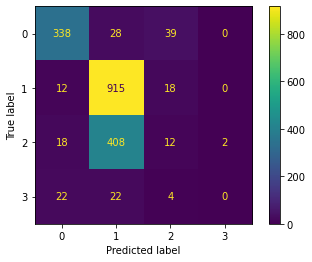

In [65]:
y_preds1 = model.predict(X_test1)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test1,
                                       y_pred=y_preds1)

In [74]:
alt = RandomForestClassifier(max_depth= 10,
                               max_features= None,
                               min_samples_leaf= 75,
                               n_estimators=100)
alt.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=75)

In [76]:
alt.score(X_test1, y_test1)

0.7100108813928183

In [77]:
las_test = lasio.read("../test-data/35_4-1.las.txt")
test_df3 = las_test.df()
test_df3.dropna(inplace=True)
test_df3["FORCE_2020_LITHOFACIES_LITHOLOGY"] = test_df3["FORCE_2020_LITHOFACIES_LITHOLOGY"].astype(int)

common_columns = merged_df.columns.intersection(test_df3.columns)
test_df3 = test_df3[common_columns]

# Replace column's entries with corresponding discrete values for test data sets
for key, value in lithologies.items():
    test_df3.loc[test_df3["FORCE_2020_LITHOFACIES_LITHOLOGY"] == key, "FORCE_2020_LITHOFACIES_LITHOLOGY"] = lithologies[key][0]

X_test3=test_df3.drop(["FORCE_2020_LITHOFACIES_LITHOLOGY"], axis=1)
y_test3=test_df3["FORCE_2020_LITHOFACIES_LITHOLOGY"]

model.score(X_test3, y_test3)


0.758016458569807

In [78]:
alt.score(X_test3, y_test3)

0.7001986379114642

In [79]:
alt.score(X_test, y_test)

0.5998178921010698

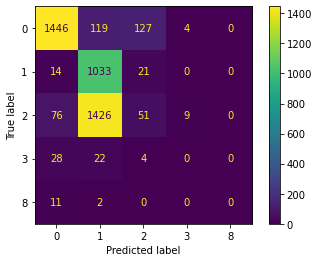

In [48]:
y_preds = model.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)

## Tune classifiers hyper parameters by hand

In [68]:
clf_2 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)

clf_2.fit(X_train, y_train)
clf_2_y_preds = clf_2.predict(X_test)

In [69]:
clf_2_metrics = evaluate_preds(y_test, clf_2_y_preds)
clf_2.score(X_test, y_test)

Acc: 58.25%
Precision: 0.58
Recall: 0.58
F1 score: 0.58


0.5825176417027088

In [70]:
clf_2.score(X_test1, y_test1)

0.6855277475516867

In [83]:
clf_2.score(X_test3, y_test3)

0.7270856980703746

## Tune Hyper parameters using RandomSearchCV

In [63]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2, 4, 6],
       "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)

In [ ]:
clf_3 = RandomizedSearchCV(RandomForestClassifier(), param_distributions=grid, n_iter=5, scoring="roc_auc", n_jobs=-1, cv=5, verbose=3)
clf_3.fit(X_train, y_train)
clf_3_y_preds = clf_3.predict(X_test)
clf_3_metrics = evaluate_preds(y_test, clf_3_y_preds)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [39]:
test_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()

0    1696
2    1562
1    1068
3      54
8      13
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [40]:
merged_df["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()

1     602069
0     151362
2     124798
3      57936
6      31047
7      12557
4       8831
10      5430
8       4288
5       1733
9       1357
11        93
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [46]:
# This function is to help use get the best combination of hyperparameter to get the best results on our model

from hyperopt import fmin, tpe, hp
from sklearn.metrics import accuracy_score


# Define the search space
space = {
    'n_estimators': hp.choice('n_estimators', range(10, 200)),
    'max_depth': hp.choice('max_depth', range(1, 20)),
    'min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0.1, 0.5),
    'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None])
}

# Define the objective function
def objective(params):
    # Instantiate RandomForestClassifier with hyperparameters
    clf = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        random_state=42  # Set a seed for reproducibility
    )

    # Train and evaluate the model
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Return the negative accuracy (minimize negative accuracy = maximize accuracy)
    return -accuracy

# Run Bayesian optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50)

# 'best' will contain the best set of hyperparameters found
print("Best Hyperparameters:", best)

100%|██████████████| 50/50 [1:24:12<00:00, 101.06s/trial, best loss: -0.3705895743227863]
Best Hyperparameters: {'max_depth': 13, 'max_features': 3, 'min_samples_leaf': 0.21314848440673473, 'min_samples_split': 0.5104333332299061, 'n_estimators': 161}


In [49]:
clf_3 = RandomForestClassifier(max_depth= 13,
                               max_features= 3,
                               min_samples_leaf= 0.21314848440673473,
                               min_samples_split=0.5104333332299061,
                               n_estimators=161)

clf_3.fit(X_train, y_train)
clf_3_y_preds = clf_3.predict(X_test)
clf_3_metrics = evaluate_preds(y_test, clf_3_y_preds)
clf_3.score(X_test, y_test)

Acc: 24.31%
Precision: 0.24
Recall: 0.24
F1 score: 0.24


0.24311404507170498

In [80]:
import xgboost as xgb
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [86]:
import xgboost as xgb
xgb_clf_2 = xgb.XGBClassifier(max_depth=10, n_estimators=100)
xgb_clf_2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
## Detail on each model
    - xgbc: xgb.XGBClassifier()
    - xgbc: xgb.XGBClassifier(max_depth=10, n_estimators=100)
    - model: RandomForestClassifier()
    - clf_2: RandomForestClassifier(n_estimators=100, max_depth=10)
        
## Detail on the each test data
    - test: merged 2 different datasets
    - test1: a random datasets loaded for test
    - test3: the exact same datasets Love used in testing her model. hence, why we arrived at the same accuracy score

In [90]:
print(xgbc.score(X_test, y_test))
print(xgbc.score(X_test1, y_test1))
print(xgbc.score(X_test3, y_test3))

0.5936717505121785
0.7078346028291621
0.6081867196367764


In [91]:
print(xgb_clf_2.score(X_test, y_test))
print(xgb_clf_2.score(X_test1, y_test1))
print(xgb_clf_2.score(X_test3, y_test3))

0.5713635328932393
0.6708378672470077
0.6683456299659478


In [92]:
print(model.score(X_test, y_test))
print(model.score(X_test1, y_test1))
print(model.score(X_test3, y_test3))

0.5759162303664922
0.6882480957562568
0.758016458569807


In [93]:
print(clf_2.score(X_test, y_test))
print(clf_2.score(X_test1, y_test1))
print(clf_2.score(X_test3, y_test3))

0.5825176417027088
0.6855277475516867
0.7270856980703746
